## Good resources:
https://www.youtube.com/watch?v=HN5d490_KKk

https://www.youtube.com/watch?v=nxWginnBklU



In [1]:
import string
import random
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
size = 100000
letters = string.ascii_letters
letters = [random.choice(letters) for x in range(size)]
extra_letters = [random.choice(letters).upper() for x in range(size)]

In [3]:
df = pd.DataFrame(columns=["letters", "extra_stuff"])
df.letters = letters
df.extra_stuff = extra_letters
df.head()

,letters,extra_stuff
0,g,T
1,O,R
2,y,C
3,v,U
4,r,Q


In [4]:
def plot_test(output, color, test_count, approach, result_df):
    sns.violinplot(output.timings, inner="quartile", color=color)
    for r in output.timings:
        result_df = result_df.append({f"test": test_count, "timings": r, "approach":approach}, ignore_index=True)
    return result_df

In [5]:
to_include = ["a", "b", "c", "d"]

## Results Dataframe

In [6]:
result_df = pd.DataFrame(columns=["test", "timings", "approach"])
test_count = 0

## If the value equals one thing or not

In [7]:
%%timeit -o -r 10
df["result"] = 0
for i, row in df.iterrows():
    if row["letters"] == "a":
        row["result"] = 1
    else:
        row["result"] = 0

7.91 s ± 391 ms per loop (mean ± std. dev. of 10 runs, 1 loop each)


<TimeitResult : 7.91 s ± 391 ms per loop (mean ± std. dev. of 10 runs, 1 loop each)>

7.91 s ± 391 ms per loop (mean ± std. dev. of 10 runs, 1 loop each)


/home/main/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


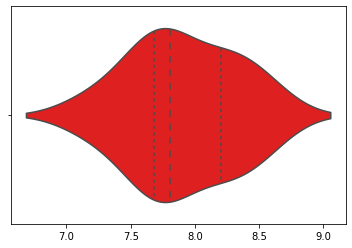

In [8]:
test_count += 1
output = _
print(output)
result_df = plot_test(output, "red", test_count, "iter", result_df)

In [9]:
%%timeit -o -r 10

def test(row):
    if row["letters"] == "a":
        return 1
    else:
        return 0

df["result"] = df.apply(test, axis=1)

575 ms ± 23.9 ms per loop (mean ± std. dev. of 10 runs, 1 loop each)


<TimeitResult : 575 ms ± 23.9 ms per loop (mean ± std. dev. of 10 runs, 1 loop each)>

575 ms ± 23.9 ms per loop (mean ± std. dev. of 10 runs, 1 loop each)


/home/main/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


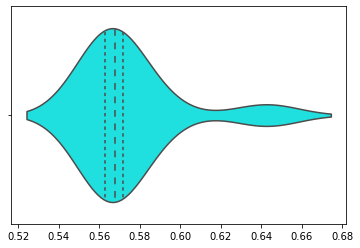

In [10]:
test_count += 1
output = _
print(output)
result_df = plot_test(output, "cyan", test_count, "apply", result_df)

In [11]:
%%timeit -o -r 10

df["result"] = 0
df["result"].loc[df["letters"].values == "a"] = 1
df["result"].loc[df["letters"].values != "a"] = 0

/home/main/.local/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


4.99 ms ± 413 µs per loop (mean ± std. dev. of 10 runs, 100 loops each)


<TimeitResult : 4.99 ms ± 413 µs per loop (mean ± std. dev. of 10 runs, 100 loops each)>

4.99 ms ± 413 µs per loop (mean ± std. dev. of 10 runs, 100 loops each)


/home/main/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


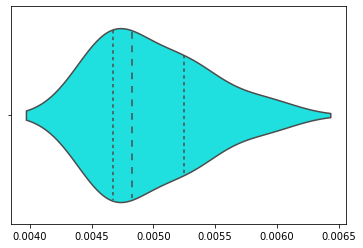

In [12]:
test_count += 1
output = _
print(output)
result_df = plot_test(output, "cyan", test_count, "builtin", result_df)

In [13]:
%%timeit -o -r 10

df['result2'] = np.where(
    df['letters'].values == "a", 
    1, 
    0
)

2.11 ms ± 80.1 µs per loop (mean ± std. dev. of 10 runs, 100 loops each)


<TimeitResult : 2.11 ms ± 80.1 µs per loop (mean ± std. dev. of 10 runs, 100 loops each)>

2.11 ms ± 80.1 µs per loop (mean ± std. dev. of 10 runs, 100 loops each)


/home/main/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


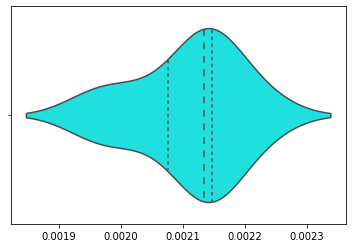

In [14]:
test_count += 1
output = _
print(output)
result_df = plot_test(output, "cyan", test_count, "numpy", result_df)

## If element is in a list
When we want to see if the elements in a column are present in an external list

In [15]:
%%timeit -o -r 10
df["result"] = 0
for i, row in df.iterrows():
    if row["letters"] in to_include:
        row["result"] = 1
    else:
        row["result"] = 0

7.89 s ± 162 ms per loop (mean ± std. dev. of 10 runs, 1 loop each)


<TimeitResult : 7.89 s ± 162 ms per loop (mean ± std. dev. of 10 runs, 1 loop each)>

7.89 s ± 162 ms per loop (mean ± std. dev. of 10 runs, 1 loop each)


/home/main/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


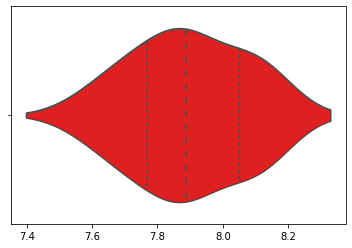

In [16]:
test_count += 1
output = _
print(output)
result_df = plot_test(output, "red", test_count, "iter", result_df)

In [17]:
%%timeit -o -r 10

def test(row, lista):
    if row["letters"] in lista:
        return 1
    else:
        return 0
        
        
df["result"] = df.apply(test, args=(to_include,), axis=1)

655 ms ± 38.1 ms per loop (mean ± std. dev. of 10 runs, 1 loop each)


<TimeitResult : 655 ms ± 38.1 ms per loop (mean ± std. dev. of 10 runs, 1 loop each)>

655 ms ± 38.1 ms per loop (mean ± std. dev. of 10 runs, 1 loop each)


/home/main/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


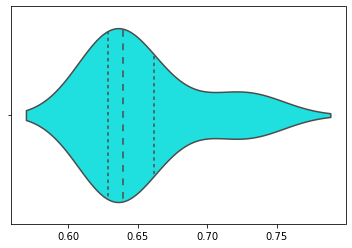

In [18]:
test_count += 1
output = _
print(output)
result_df = plot_test(output, "cyan", test_count, "apply", result_df)

In [19]:
%%timeit -o -r 10
df["result"] = 0
df["result"].loc[df["letters"].isin(to_include)] = 1
df["result"].loc[df["letters"].isin(to_include)] = 0

/home/main/.local/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


9.69 ms ± 490 µs per loop (mean ± std. dev. of 10 runs, 100 loops each)


<TimeitResult : 9.69 ms ± 490 µs per loop (mean ± std. dev. of 10 runs, 100 loops each)>

9.69 ms ± 490 µs per loop (mean ± std. dev. of 10 runs, 100 loops each)


/home/main/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


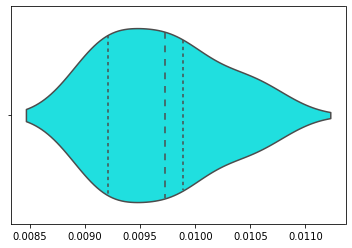

In [20]:
test_count += 1
output = _
print(output)
result_df = plot_test(output, "cyan", test_count, "builtin", result_df)

In [21]:
%%timeit -o -r 10
df['result2'] = np.where(
    np.isin(df['letters'].values, to_include), 
    1, 
    0
)

7.81 ms ± 304 µs per loop (mean ± std. dev. of 10 runs, 100 loops each)


<TimeitResult : 7.81 ms ± 304 µs per loop (mean ± std. dev. of 10 runs, 100 loops each)>

7.81 ms ± 304 µs per loop (mean ± std. dev. of 10 runs, 100 loops each)


/home/main/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


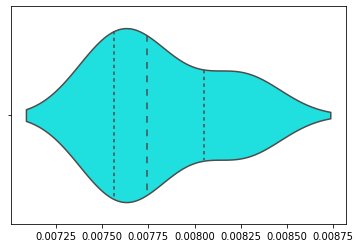

In [22]:
test_count += 1
output = _
print(output)
result_df = plot_test(output, "cyan", test_count, "numpy", result_df)

In [23]:
%%timeit -o -r 10
df['result2'] = np.where(
    df['letters'].isin(to_include), 
    1, 
    0
)

4.31 ms ± 193 µs per loop (mean ± std. dev. of 10 runs, 100 loops each)


<TimeitResult : 4.31 ms ± 193 µs per loop (mean ± std. dev. of 10 runs, 100 loops each)>

9
4.31 ms ± 193 µs per loop (mean ± std. dev. of 10 runs, 100 loops each)


/home/main/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


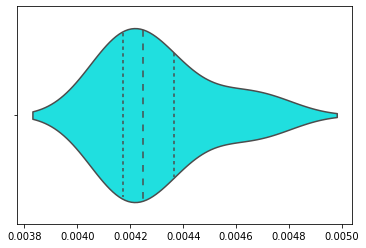

In [24]:
test_count += 1
print(test_count)
output = _
print(output)
result_df = plot_test(output, "cyan", test_count, "numpy", result_df)

## Cumulative sums

In [25]:
df = pd.DataFrame(columns=["number"])
df["number"] = range(size)
df["cumulativesum"] = 0


In [26]:
%%timeit -o -r 10

counter = 0
for i, row in df.iterrows():
    counter += row["number"]
    row["cumulativesum"] = counter

6.71 s ± 318 ms per loop (mean ± std. dev. of 10 runs, 1 loop each)


<TimeitResult : 6.71 s ± 318 ms per loop (mean ± std. dev. of 10 runs, 1 loop each)>

6.71 s ± 318 ms per loop (mean ± std. dev. of 10 runs, 1 loop each)


/home/main/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


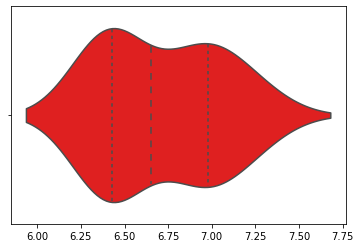

In [27]:
test_count += 1
output = _
print(output)
result_df = plot_test(output, "red", test_count, "iter", result_df)

In [28]:
%%timeit -o -r 10

df["newcumsum"] = df["number"].cumsum()

529 µs ± 63.2 µs per loop (mean ± std. dev. of 10 runs, 1000 loops each)


<TimeitResult : 529 µs ± 63.2 µs per loop (mean ± std. dev. of 10 runs, 1000 loops each)>

529 µs ± 63.2 µs per loop (mean ± std. dev. of 10 runs, 1000 loops each)


/home/main/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


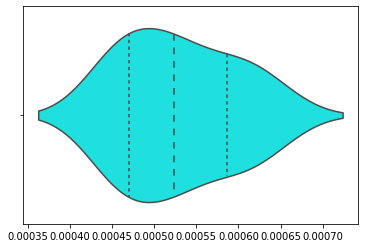

In [29]:
test_count += 1
output = _
print(output)
result_df = plot_test(output, "cyan", test_count, "builtin", result_df)

In [30]:
%%timeit -o -r 10

df["newcumsum"] = df["number"].values.cumsum()

390 µs ± 55.9 µs per loop (mean ± std. dev. of 10 runs, 1000 loops each)


<TimeitResult : 390 µs ± 55.9 µs per loop (mean ± std. dev. of 10 runs, 1000 loops each)>

390 µs ± 55.9 µs per loop (mean ± std. dev. of 10 runs, 1000 loops each)


/home/main/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


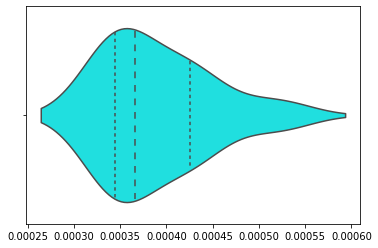

In [31]:
test_count += 1
output = _
print(output)
result_df = plot_test(output, "cyan", test_count, "numpy", result_df)

# Comparing results

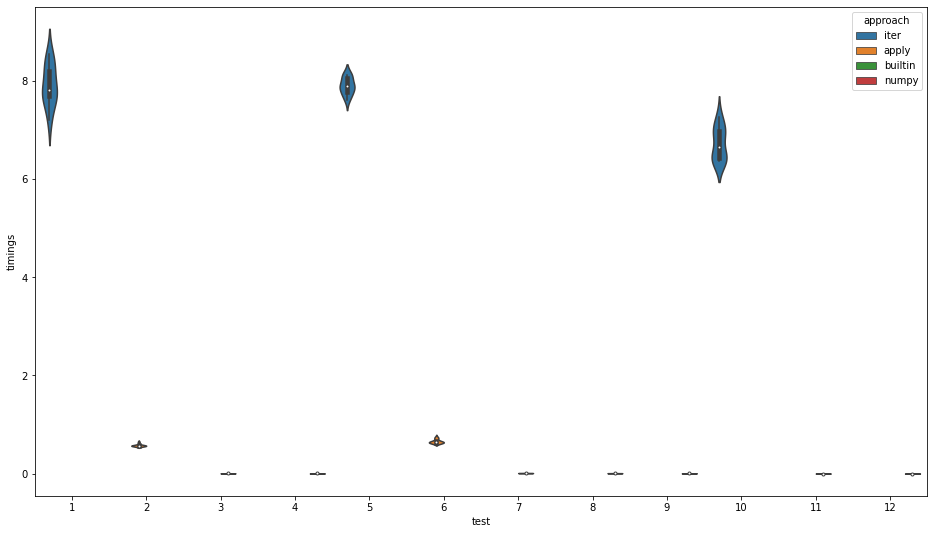

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline
result_df["test"] = result_df["test"].astype(int)
plt.figure(figsize=(16, 9))
sns_plot = sns.violinplot(x="test", y="timings", data=result_df, hue="approach")
fig = sns_plot.get_figure()
fig.savefig(f"test-size-all-{size}.png")

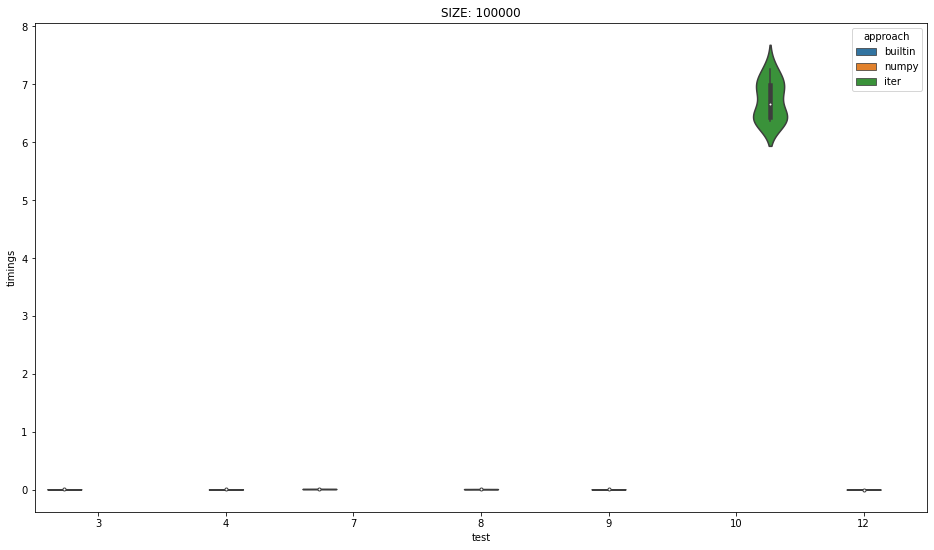

In [33]:
%matplotlib inline
to_exclude = [1,2,5,6,11] #  Exclude iterrows and apply
result_df["test"] = result_df["test"].astype(int)
plt.figure(figsize=(16, 9))
sns_plot = sns.violinplot(x="test", y="timings", data=result_df.loc[~result_df.test.isin(to_exclude)], hue="approach").set_title(f"SIZE: {size}")
fig = sns_plot.get_figure()
fig.savefig(f"test-size-{size}.png")

### Results for 100 rows
<img src="files/test-size-100.png">

### Results for 1000 rows
<img src="files/test-size-1000.png">

### Results for 100k rows
<img src="files/test-size-100000.png">

### Results for 1M rows
<img src="files/test-size-1000000.png">


# All approaches

### Results for 100 rows
<img src="files/test-size-all-100.png">

### Results for 1000 rows
<img src="files/test-size-all-1000.png">

### Results for 100k rows
<img src="files/test-size-all-100000.png">

### Results for 1M rows
<img src="files/test-size-all-1000000.png">


# When should I care?

https://stackoverflow.com/questions/54028199/are-for-loops-in-pandas-really-bad-when-should-i-care